In [ ]:
from zipfile import ZipFile
filename = 'archive.zip'
with ZipFile(filename,'r') as Zip:
  Zip.extractall()
  print("done")

done


In [ ]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
TrainingImagePath='/content/Alzheimer_s Dataset/train'
TestingImagePath='/content/Alzheimer_s Dataset/test'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

This is for data augmentaion

rescale: Rescales the pixel values of the images by a factor of 1/255. This is a standard preprocessing step for image data as it makes the pixel values fall within the range of 0 to 1.

shear_range: Randomly applies shearing transformations to the images. Shearing is a type of transformation that slants the shape of an object.

zoom_range: Randomly applies zooming transformations to the images. Zooming is a type of transformation that either zooms in or out of the image.

horizontal_flip: Randomly flips the images horizontally. This is a common augmentation technique that can increase the size of the dataset and help the model become more robust to horizontal flips


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255
                                  )

In [ ]:
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(299,299),
        batch_size=64,
        class_mode='categorical',
        )

Found 5121 images belonging to 4 classes.


TrainingImagePath: This parameter specifies the path to the directory containing the training images. The directory should have one subdirectory per class, and each image should be in its respective subdirectory.

target_size: This parameter specifies the size of the input images after they are resized. The images are resized to a 128 x 128 pixel size in this code.

batch_size: This parameter specifies the number of images in each batch. In this case, the batch size is 32.

class_mode: This parameter specifies the type of labels that the generator will return. In this code, the labels are one-hot encoded categorical labels, meaning that each image is assigned a vector of length N, where N is the number of classes, with a value of 1 in the position corresponding to the class to which the image belongs, and 0s elsewhere.

In [ ]:
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(299,299),
        batch_size=64,
        class_mode='categorical'
        )

Found 1279 images belonging to 4 classes.


test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

In [ ]:
import numpy as np
from PIL import Image
import os

# Directory containing the image files
directory = '/content/Alzheimer_s Dataset/train'

# Get the list of image file names in the directory
image_files = os.listdir(directory)

# Define a function to load and convert an image to a numpy array
def load_image(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    return img_array

# Load and convert each image to a numpy array
image_arrays = []
for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    if os.path.isfile(image_path):  # Check if the path is a file
        image_array = load_image(image_path)
        image_arrays.append(image_array)

# Convert the list of arrays to a numpy array
training_data = np.array(image_arrays)

# Print the shape of the training data
print("Shape of training data:", training_data.shape)




Shape of training data: (0,)


In [ ]:
%matplotlib inline
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)
    plt.showw()

def showImages(class_name):: This line defines a function called showImages() that takes in a single parameter called class_name. The parameter is expected to be a string that corresponds to the name of a class in the training data.

random_index = random.choice(list(range(1, 49))): This line generates a random integer between 1 and 48 (inclusive) to select a random image from the specified class.

folder_path=os.path.join(TrainingImagePath, class_name): This line creates a string containing the path to the directory containing the images for the specified class.

try: ... except: ...: This block of code tries to load the image with the filename corresponding to the random index. If the file doesn't exist (i.e. the image filenames are two digits instead of three), it tries to load the image with a modified filename. If neither file exists, the function will raise an error.

plt.imshow(mpimg.imread(image_path)): This line loads the image with the specified filename and displays it using the imshow() function from the matplotlib.pyplot module.

plt.title(class_name): This line sets the title of the plot to the name of the class.

plt.axis(False): This line turns off the axis labels for the plot

In [ ]:
test_set.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

test_set.class_indices is a Python dictionary that maps the class names to their corresponding integer indices. The keys of the dictionary are the class names (strings), and the values are the integer indices (integers) that correspond to each class

In [ ]:
import zipfile
TrainClasses=training_set.class_indices
ResultMap={0:'MildDemented',1:'ModerateDemented',2:'NonDemented',3:'VeryMildDemented'}
import pickle
with open("/content/Alzheimer_s Dataset.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)
OutputNeurons= len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  4


This code creates a dictionary called TrainClasses that maps the class names to their corresponding integer indices in the training_set object. It also defines a dictionary called ResultMap that maps the integer class labels to their corresponding class names, with keys 0 to 3.

The code then imports the pickle module and uses it to save the ResultMap dictionary as a pickled file named 'ResultsMap.pkl' in the specified directory.

Finally, the code sets the variable OutputNeurons to the length of the ResultMap dictionary, which is the number of output neurons that will be required for the neural network. In this case, the OutputNeurons variable will be set to 4, since there are four classes in the ResultMap dictionary.

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
classifier=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",

    input_shape=(299,299,3)


)

last_layer = classifier.layers[-1]
new_output_layer = Dense(4, activation='softmax')(last_layer.output)


classifier.trainable = False


In [ ]:


from tensorflow.keras.layers import Input, Convolution2D, Dropout
from tensorflow.keras.models import Model



# First convolutional layer
x = Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu')(classifier.output)
x = Dropout(0.5)(x)

# Second convolutional layer
x = Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu')(x)
x = Dropout(0.5)(x)


x= Flatten()(x)


x = Dense(4, activation='softmax')(x)


# Create the functional model
classifier1 = Model(inputs=classifier.input, outputs=x)

classifier1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    factor=0.5,
    min_lr=0.001
)


In [ ]:
callbacks = [earlystop, learning_rate_reduction]


The CNN architecture consists of the following layers:

A 2D convolutional layer with 32 filters, each with a kernel size of 3x3 and a stride of 1. The input shape is set to (128,128,3) to match the size of the input images, which are RGB images with 128x128 pixels. The activation function used is ReLU.
A max pooling layer with a pool size of 2x2. This reduces the spatial dimensions of the output from the previous layer by a factor of 2.
Another 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a stride of 1. The activation function used is ReLU.
Another max pooling layer with a pool size of 2x2.
A flatten layer that converts the 2D output of the previous layer into a 1D vector that can be passed to a dense layer.
A dense layer with 256 units and an activation function of ReLU.
A dropout layer with a rate of 0.5 to prevent overfitting.
Another dense layer with OutputNeurons units (which is set to 4 in the previous code cell), representing the number of classes in the data. The activation function used is softmax, which outputs a probability distribution over the classes.
Another dropout layer with a rate of 0.5 to prevent overfitting.
The compile() method is then called to configure the learning process. The loss function is set to categorical cross-entropy, which is appropriate for multi-class classification problems like this one. The optimizer is set to 'rmsprop', and the metric used to evaluate the performance of the model is accuracy.

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 dropout_2 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_97 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [ ]:
model_history = classifier1.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    verbose=1
)


Epoch 1/10
81/81 [==============================] - 115s 1s/step - loss: 1.5683 - accuracy: 0.4566
Epoch 2/10
81/81 [==============================] - 104s 1s/step - loss: 1.0020 - accuracy: 0.5079
Epoch 3/10
81/81 [==============================] - 102s 1s/step - loss: 0.9542 - accuracy: 0.5466
Epoch 4/10
81/81 [==============================] - 103s 1s/step - loss: 0.9323 - accuracy: 0.5440
Epoch 5/10
81/81 [==============================] - 103s 1s/step - loss: 0.9193 - accuracy: 0.5595
Epoch 6/10
81/81 [==============================] - 102s 1s/step - loss: 0.9032 - accuracy: 0.5577
Epoch 7/10
81/81 [==============================] - 103s 1s/step - loss: 0.8954 - accuracy: 0.5716
Epoch 8/10
81/81 [==============================] - 102s 1s/step - loss: 0.8867 - accuracy: 0.5722
Epoch 9/10
81/81 [==============================] - 102s 1s/step - loss: 0.8828 - accuracy: 0.5696
Epoch 10/10
81/81 [==============================] - 101s 1s/step - loss: 0.8714 - accuracy: 0.5718


The fit_generator() method trains the model on the data generated batch-by-batch by the ImageDataGenerator() objects, which load the images and their corresponding labels from the training and validation directories.

The arguments passed to fit_generator() are:

training_set: the ImageDataGenerator() object that generates the training data.
steps_per_epoch: the number of batches of samples to yield from the generator for one epoch. This is set to the length of the training_set, which is the number of training samples divided by the batch size.
epochs: the number of epochs to train the model for.
shuffle: whether to shuffle the training data before each epoch.
verbose: the level of detail to display during training.
The fit_generator() method returns a History object, which contains information about the training process, such as the loss and accuracy values for each epoch. This object is assigned to the variable model_history.

In [ ]:
predictions = classifier1.predict(test_set)

20/20 [==============================] - 15s 465ms/step


In [ ]:
print(predictions)

[[0.13218544 0.40706903 0.13429178 0.32645372]
 [0.11214389 0.27227145 0.14738576 0.46819893]
 [0.13837019 0.500696   0.19001846 0.17091532]
 ...
 [0.15918963 0.13772695 0.13165976 0.57142365]
 [0.1703143  0.15534945 0.18168403 0.4926522 ]
 [0.13217916 0.3113126  0.17019148 0.38631672]]


In [ ]:
test_set.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the trained model


# Directory containing the test dataset images
test_directory = '/content/Alzheimer_s Dataset/test/VeryMildDemented/'

# Get the list of image file names in the test directory
image_files = os.listdir(test_directory)

# Predict labels for each image in the test dataset
for image_file in image_files:
    # Construct the path to the image file
    image_path = os.path.join(test_directory, image_file)

    # Skip directories if encountered
    if os.path.isdir(image_path):
        continue

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values

    # Make predictions on the image
    predictions = classifier1.predict(img_array)

    # Interpret the predictions
    predicted_labels = []
    threshold = 0.4  # Adjust this threshold based on your problem
    for i, pred in enumerate(predictions[0]):
        if pred >= threshold:
            predicted_labels.append(i)

    # Print the predicted labels for the current image
    print("Image:", image_file)
    print("Predicted labels:", predicted_labels)
    print()


1/1 [==============================] - 0s 35ms/step
Image: 30 (45).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 33ms/step
Image: 30 (47).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 33ms/step
Image: 31 (30).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 34ms/step
Image: 27 (46).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 32ms/step
Image: 32 (10).jpg
Predicted labels: []

1/1 [==============================] - 0s 31ms/step
Image: 29 (60).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 31ms/step
Image: 31 (54).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 32ms/step
Image: 27 (7).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 34ms/step
Image: 30 (67).jpg
Predicted labels: []

1/1 [==============================] - 0s 33ms/step
Image: 30 (63).jpg
Predicted labels: [3]

1/1 [==============================] - 0s 32ms/step
Image: 32 (

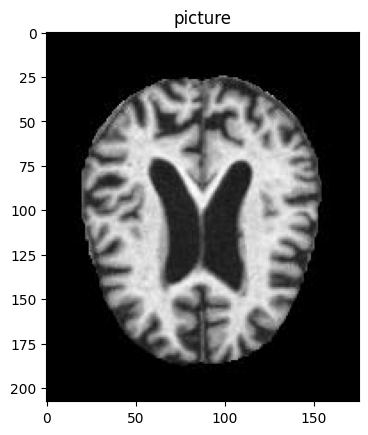

Prediction is:  VeryMildDemented


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

testImage=R"/content/Alzheimer_s Dataset/test/ModerateDemented/28 (2).jpg"
test_image=load_img(testImage,target_size=(299,299))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier1.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()


print('Prediction is: ',ResultMap[np.argmax(result)])

In [ ]:
l=print(np.argmax(result))

3


This code tests the trained CNN on a single image.

The code uses the load_img() function from the Keras API to load an image from the file path specified by testImage and resizes it to the input shape expected by the model. The img_to_array() function is then used to convert the image to a numpy array, which can be input to the model.

The np.expand_dims() function is used to add an extra dimension to the array to represent the batch size, which is required by the predict() method.

The predict() method is called on the classifier object with the test_image array as the input. This returns an array of probabilities for each class.

The class with the highest probability is determined using the argmax() function and the corresponding label is retrieved from the ResultMap dictionary.

Finally, the original image is loaded using cv2.imread() and displayed using plt.imshow(). The predicted class is printed to the console using print().


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

support = sum of nos in a row of the matrix
